1.0


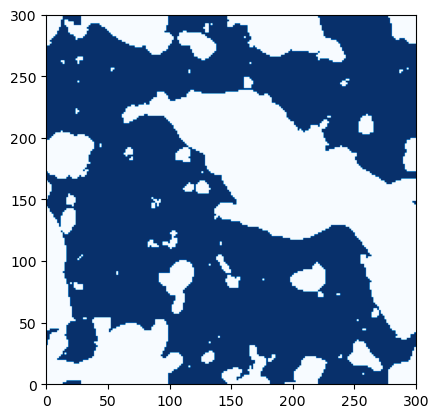

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

def load_xHI_cube(xHI_cube_file):
    # Get box dimensions (pixels) and size (cMpc)
    DIM  = int(xHI_cube_file.split('Mpc')[0].split('_')[-2])
    size = int(xHI_cube_file.split('Mpc')[0].split('_')[-1])
    #print(DIM, size)

    # Reshape cube (is 1D array --> make it 3D)
    xHI_cube = load_binary_data(xHI_cube_file)

    xHI_cube.shape = (DIM, DIM, DIM)
    xHI_cube = xHI_cube.reshape((DIM, DIM, DIM), order='F')
    print(xHI_cube.max())
    return xHI_cube, DIM, size


def load_binary_data(file):
    # Read binary data from file
    return np.fromfile(file, dtype=np.float32)

# read xHI cube
xHIboxfilname='xH_nohalos_z008.00_nf0.623784_eff1359.2_effPLindex0_HIIfilter1_Mmin1.0e+11_RHIImax50_200_300Mpc'
xHIcube, DIM, size =load_xHI_cube("D:/Thesis/d5nAGF0VAa/test_box_xHI_galcat/" + xHIboxfilname)

# read galaxy catalog
masfilname='taudamp_z008.00_nf0.62378_1000_300Mpc_master_bubnoadded.csv'
galcat = pd.read_csv("D:/Thesis/d5nAGF0VAa/test_box_xHI_galcat/" +masfilname)

# plot a slice of the xHIcube
i_zslice=1 # plot the 100th slice for example
extent=[0,size,0,size]
aspect =(extent[1]-extent[0])/(extent[3]-extent[2])
plt.imshow(np.rot90(xHIcube[:,:,i_zslice]),extent=extent,aspect=aspect, cmap = "Blues")


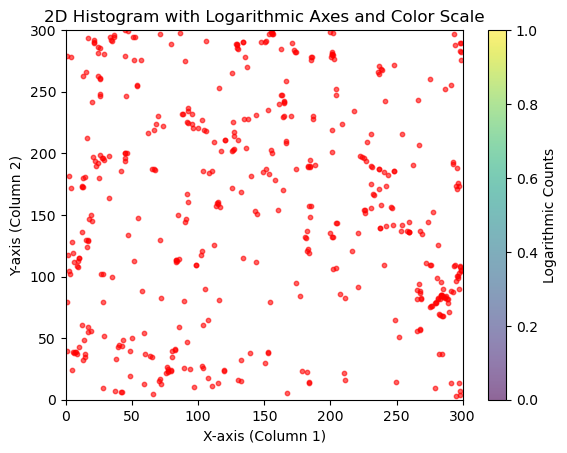

In [3]:
import matplotlib as mpl
from matplotlib import colors

df = pd.read_csv(masfilname)

data = df.iloc[:, 1:4]  


x = data.iloc[:, 0] 
y = data.iloc[:, 1] 
z = data.iloc[:, 2]

mask = 300*z <= 1.5
x_filtered = x[mask]
y_filtered = y[mask]

# Create 2D histogram with a logarithmic color scale
plt.scatter(300*x_filtered, 300*y_filtered, s = 10, alpha=0.6, c = "Red")

# Add a color bar and labels
plt.colorbar(label='Logarithmic Counts')



# Add labels and title
plt.xlabel('X-axis (Column 1)')
plt.ylabel('Y-axis (Column 2)')
plt.title('2D Histogram with Logarithmic Axes and Color Scale')
plt.xlim([0,300])
plt.ylim([0,300])

# Show the plot
plt.show()

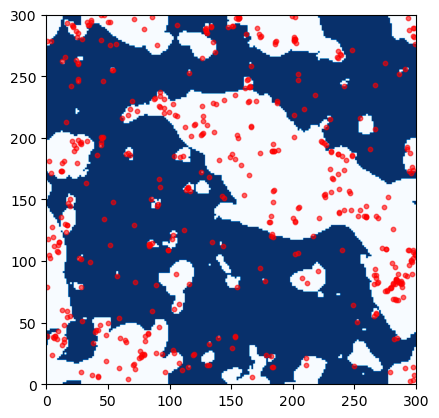

In [4]:
plt.imshow(np.rot90(xHIcube[:,:,i_zslice]),extent=extent,aspect=aspect, cmap = "Blues")
plt.scatter(300*x_filtered, 300*y_filtered, s = 10, alpha=0.6, c = "Red")

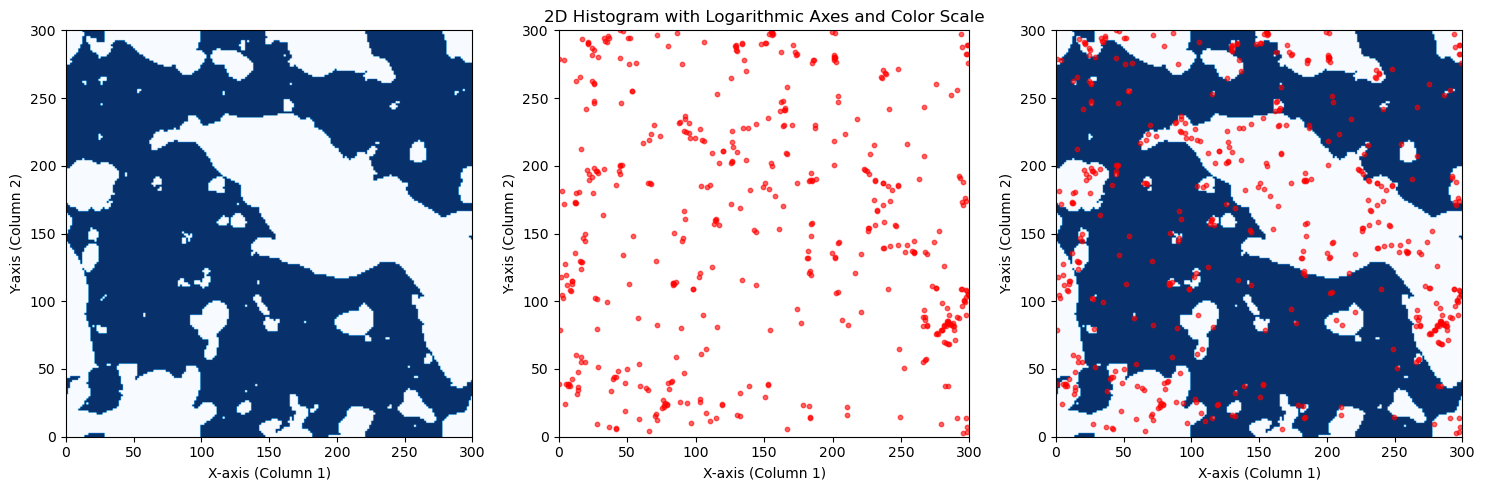

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot each histogram in its respective subplot

axes[0].imshow(np.rot90(xHIcube[:,:,i_zslice]),extent=extent,aspect=aspect, cmap = "Blues")
axes[0].set_xlabel('X-axis (Column 1)')
axes[0].set_ylabel('Y-axis (Column 2)')


axes[1].scatter(300*x_filtered, 300*y_filtered, s = 10, alpha=0.6, c = "Red")




# Add labels and title
axes[1].set_xlabel('X-axis (Column 1)')
axes[1].set_ylabel('Y-axis (Column 2)')
axes[1].set_title('2D Histogram with Logarithmic Axes and Color Scale')
axes[1].set_xlim([0,300])
axes[1].set_ylim([0,300])




axes[2].imshow(np.rot90(xHIcube[:,:,i_zslice]),extent=extent,aspect=aspect, cmap = "Blues")
axes[2].scatter(300*x_filtered, 300*y_filtered, s = 10, alpha=0.6, c = "Red")
axes[2].set_xlabel('X-axis (Column 1)')
axes[2].set_ylabel('Y-axis (Column 2)')



# Adjust layout
plt.tight_layout()
plt.show()

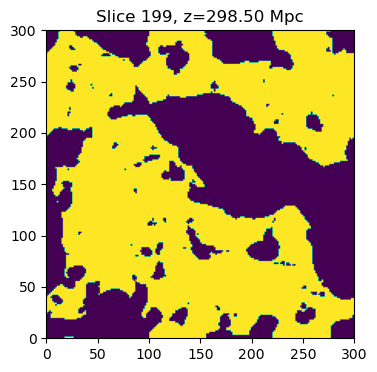

In [6]:
from matplotlib.animation import FuncAnimation, PillowWriter

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(4, 4))

# Define the extent and aspect for plotting
extent = [0, size, 0, size]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

im = ax.imshow(np.rot90(xHIcube[:, :, 0]), extent=extent, aspect=aspect, cmap='viridis')
scatter = ax.scatter(300*x_filtered, 300*y_filtered, s = 10, alpha=0.6, c = "Red")

# Function to update each frame (each slice)
def update(i_zslice):
    # Update the xHI cube slice
    im.set_array(np.rot90(xHIcube[:, :, i_zslice]))

    # Calculate the z position of the slice
    z_position = i_zslice * (size / DIM)

    # Filter halos within the current slice (using tolerance)
    tolerance = size / DIM
    halos_in_slice = galcat[(galcat['z'] >= z_position - tolerance/2) & (galcat['z'] < z_position + tolerance/2)]

    # Update the halo positions for the current slice
    scatter.set_offsets(np.c_[halos_in_slice['x'], halos_in_slice['y']])

    # Set the title with the slice number and z-position
    ax.set_title(f'Slice {i_zslice}, z={z_position:.2f} Mpc')

    return im, scatter  # Return the updated objects

# Create the animation
ani = FuncAnimation(fig, update, frames=DIM, interval=200, blit=True, repeat=False)

ani.save('xHI_cube.gif', writer=PillowWriter(fps=10))

plt.show()

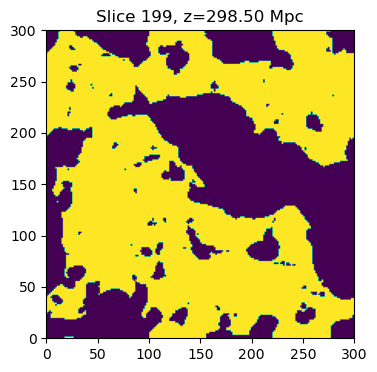

In [36]:
from matplotlib.animation import FuncAnimation, PillowWriter

# Create a figure for the animation
fig, ax = plt.subplots(figsize=(4, 4))

# Define the extent and aspect for plotting
extent = [0, size, 0, size]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

im = ax.imshow(np.rot90(xHIcube[:, :, 0]), extent=extent, aspect=aspect, cmap='viridis')
scatter = ax.scatter([], [], color='red', marker='o', s=10, label='Halos')

# Function to update each frame (each slice)
def update(i_zslice):
    # Update the xHI cube slice
    im.set_array(np.rot90(xHIcube[:, :, i_zslice]))

    # Calculate the z position of the slice
    z_position = i_zslice * (size / DIM)

    # Filter halos within the current slice (using tolerance)
    tolerance = size / DIM
    halos_in_slice = galcat[(galcat['z'] >= z_position - tolerance/2) & (galcat['z'] < z_position + tolerance/2)]

    # Update the halo positions for the current slice
    scatter.set_offsets(np.c_[halos_in_slice['x'], halos_in_slice['y']])

    # Set the title with the slice number and z-position
    ax.set_title(f'Slice {i_zslice}, z={z_position:.2f} Mpc')

    return im, scatter  # Return the updated objects

# Create the animation
ani = FuncAnimation(fig, update, frames=DIM, interval=200, blit=True, repeat=False)

# Save the animation as a video file (e.g., mp4) or GIF
# For mp4 (requires ffmpeg), uncomment the following:
# ani.save('xHI_cube_animation.mp4', writer='ffmpeg', dpi=300)

# For GIF (requires pillow), uncomment the following:
ani.save('xHI_cube_animation.gif', writer=PillowWriter(fps=10))

plt.show()